# Budapest Road accidents 


In [ ]:
# Data sources for reference:
# https://atlo.team/boda/
# https://drive.google.com/file/d/14Q64gvkqDmaGy2ToeOjIUyyyuYPy9bqN/view?usp=sharing

In [6]:
import osmnx as ox
import geopandas as gpd
import folium
import branca.colormap as cm


In [12]:
# https://atlo.team/boda/
# https://drive.google.com/file/d/14Q64gvkqDmaGy2ToeOjIUyyyuYPy9bqN/view?usp=sharing


import os
print(os.getcwd())


/Users/pallabibhattacharya/Desktop/Python_work


In [16]:
gdf = gpd.read_file("/Users/pallabibhattacharya/Downloads/budbalesetroads.geojson")


/usr/local/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 90598 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [15]:
#fix the dataset itself
gdf = gdf.reset_index(drop=True)
gdf["fid"] = gdf.index


In [19]:
# Preview first 3 rows
gdf.head(3)

,fid,osm_id,code,fclass,layer,id,_Medianmean,geometry
0,1,4059955,5114,secondary,0,58303,1.259259,"LINESTRING (19.04973 47.48765, 19.04983 47.487..."
1,2,4059964,5115,tertiary,0,59919,47.910000,"LINESTRING (19.05567 47.52694, 19.05518 47.526..."
2,3,4059966,5124,pedestrian,0,59980,1.566667,"LINESTRING (19.05797 47.48741, 19.05755 47.487..."


In [20]:
# lets check the total data length

print(len(gdf))

86709


<AxesSubplot: >

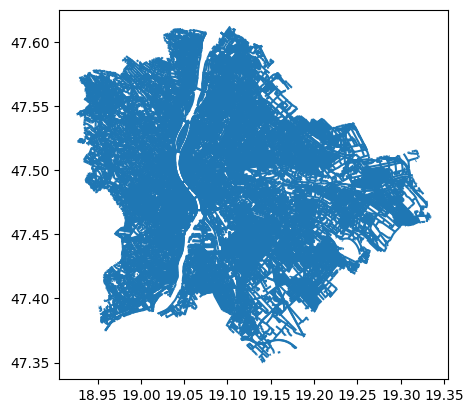

In [21]:
#lets plot it 
gdf.plot()

In [ ]:
import branca.colormap as cm
colormap = cm.LinearColormap(
    colors=list(cm.linear.viridis.colors),  # lowercase 'viridis'
    vmin=gdf["_Medianmean"].min(),
    vmax=gdf["_Medianmean"].max()
).to_step(10)

# Get bounding box and center
minx, miny, maxx, maxy = gdf.total_bounds
center = [(miny + maxy) / 2, (minx + maxx) / 2]

# Folium map
m = folium.Map(location=center, zoom_start=12, tiles="CartoDB positron")

# styling
folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        "color": colormap(feature["properties"]["_Medianmean"]),
        "weight": 3,
        "opacity": 0.9
    }
).add_to(m)


# fix map to bounds
m.fit_bounds([[miny, minx], [maxy, maxx]])


m.save("budapest_accidents_2025.html")


m